In [1]:
import numpy as np
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [7]:
clean = pd.read_csv('data/clean/clean_meteorite_landings.csv')

In [8]:
clean.describe()

,id,mass,year,reclat,reclong
count,31705.000000,3.170500e+04,31705.000000,31705.000000,31705.000000
mean,20751.653272,1.867359e+04,1987.087084,-47.602009,73.452607
std,14974.205352,6.892699e+05,26.791228,46.714171,83.419083
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9190.000000,6.530000e+00,1983.000000,-79.683330,26.000000
50%,18511.000000,3.007000e+01,1991.000000,-72.000000,57.147030
75%,27300.000000,2.050000e+02,2000.000000,18.393170,159.414820
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


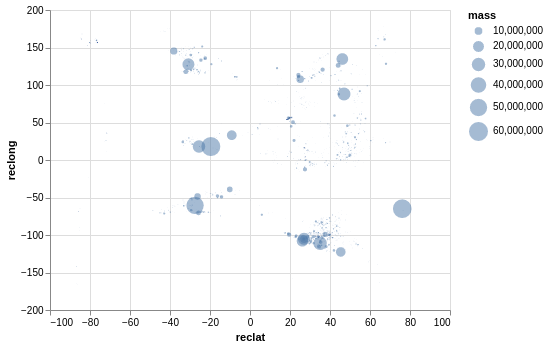

In [10]:
alt.Chart(clean).mark_circle(opacity=0.5).encode(
    alt.X('reclat'),
    alt.Y('reclong'),
    size='mass'
)

/home/waielonh/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


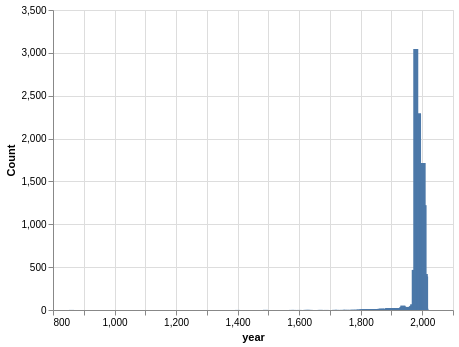

In [11]:
alt.Chart(clean.groupby(by='year').agg({'id': 'count'}).reset_index()).mark_bar().encode(
    alt.Y('id', title='Count'),
    alt.X('year')
)

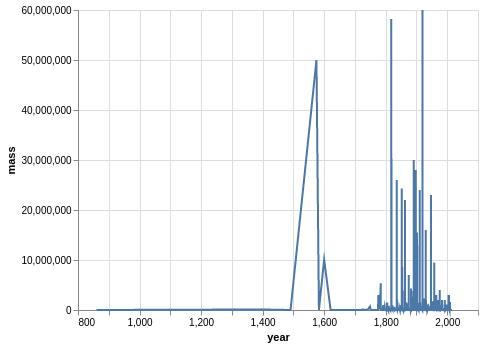

In [12]:
alt.Chart(clean).mark_line().encode(
    alt.X('year'),
    alt.Y('mass')
)

/home/waielonh/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


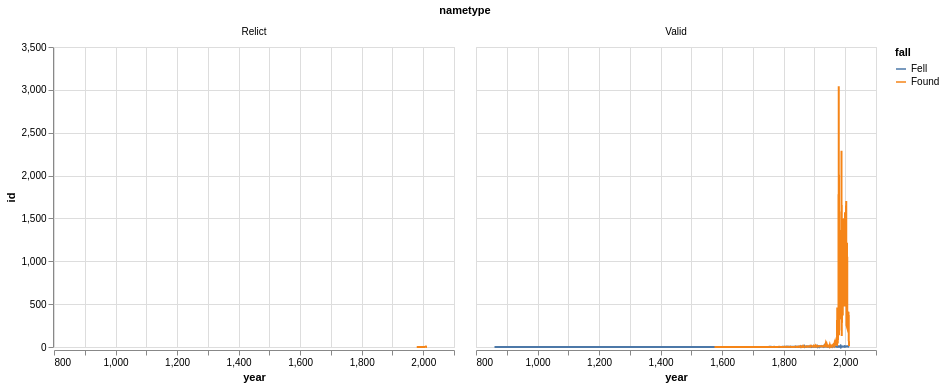

In [13]:
alt.Chart(clean.groupby(by=['year', 'fall', 'nametype']).agg({'id': 'count'}).reset_index()).mark_line().encode(
    alt.Y('id'),
    alt.X('year'),
    color='fall'
).facet('nametype')